<h1 style="color:red"><center>Shopping Mall Customers Classification</center></h1>

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/Janak_Place_Shopping_Complex_2.jpg/800px-Janak_Place_Shopping_Complex_2.jpg?20170703045046)

<h2 style="color:ornage">About Data</h2>

### Context

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data


![title](https://www.researchgate.net/profile/Julia-Bergmann-4/publication/337166847/figure/fig3/AS:824066491559942@1573484170571/Cross-Industry-Standard-Process-for-Data-Mining-CRISP-DM-in-the-style-of-Chapman-et.png)

<h2 style="color:orange">Content</h2>


- 1.<a href="#1">Bussiness Promblem</a>


- 2.<a href="#2">Data Understanding</a>
- -  2-1.<a hred="#2_1">Load Data</a>
- -  2-2.<a hred="#2_2">EDA</a>
- 3.<a href="#3">Data PreProcessing</a>
- - 3 -1.<a href="#3_1">Rename Columns</a>
- - 3 -2.<a href="#3_2">Remove Unwanted Columns</a>
- - 3 -3.<a href="#3_3">Dealing with Missing values</a>
- - 3 -4.<a href="#3_4">Encoding</a>
- - 3 -5.<a href="#3_5">Scaling</a>
- - 3 -6.<a href="#3_6">Dimensionality Reduction</a>
- 4.<a href="#4">Modelling</a>
- 5.<a href ="#5">Evaluation</a>

<a id="1"></a>
<h3 style="color:blue">1.Bussiness Promblem</h3>

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

<h3 style="color:blue">2.Data Understanding</h3>
<a id="2"></a>

<h4 style="color:skyblue">2.1 load data & Required libiraries</h4>
<a id="2_1"></a>


In [1]:
# EDA
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
from matplotlib.lines import Line2D 
import matplotlib.pyplot as plt
%matplotlib inline

# Scaling
from sklearn.preprocessing import StandardScaler

# Dimensional
from sklearn.decomposition import PCA

# Clustering
from sklearn.cluster import KMeans

# Evaluation
from sklearn.metrics import silhouette_samples, silhouette_score

**Load Dataset**

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h4 style="color:skyblue">2.2 EDA</h4>

In [3]:
df.shape

(200, 5)

200 Rows and 5 Columns

In [4]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

One categorial variable and Three Numerical variable

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<h6 style="color:red">Percentage</h6>

In [7]:
df["Genre"].value_counts()/len(df["Genre"].value_counts())

Female    56.0
Male      44.0
Name: Genre, dtype: float64

Female = 56 %
Male   = 44 %

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<h3 style="color:blue">3.Data PreProcessing</h3>
<a id="3"></a>


<h4 style="color:skyblue">3.1 Rename Column</h4>

In [9]:
df.rename(columns={"Genre":"Gender"},inplace=True)

In [10]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


<h4 style="color:skyblue">3.2 Drop Useless Features</h4>

In [11]:
df=df.drop("CustomerID",axis=1)

In [12]:
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


<h4 style="color:skyblue">3.3 Null Values TreatMent</h4>

In [13]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<h4 style="color:skyblue">3.4 Encoding</h4>

In [14]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [15]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [16]:
df["Gender"].replace({"Male":1,"Female":0},inplace=True)

In [17]:
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


**Everything Look's Good I will do  Scaling and dimension reduction after visualzation**

<h3 style="color:green"><center>Story Telling  & Visualization<center></h3>

 - Lets First Check Which Features coorelated 

In [19]:
correlation=df.corr()
correlation

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


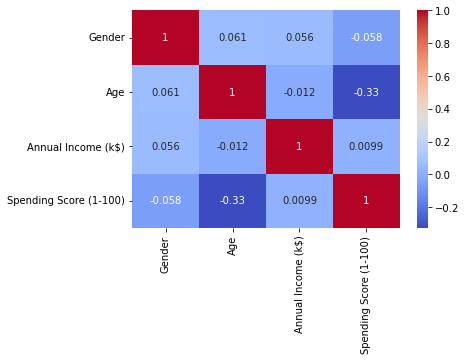

In [20]:
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.show()

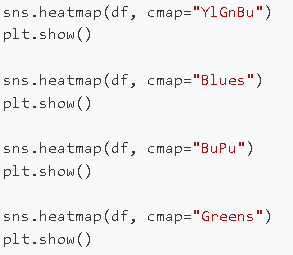

**Observations :**
- Heat map showing the Age is highly coorleated with spending score
- We can analyse the age and spending score

<h6 style="color:red">Relationship between the Gender and Spending score</h6>

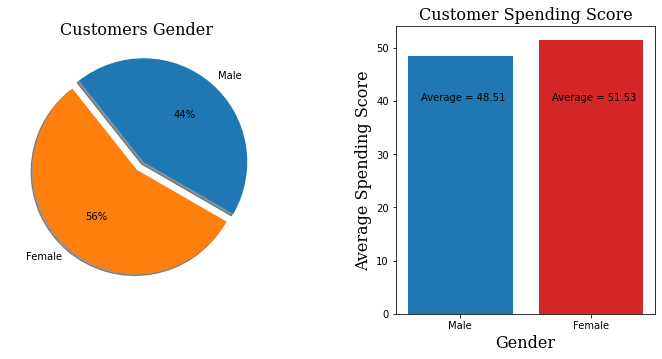

In [21]:
# Setting the font style and Size
plt_font={'family':'serif','size':16}

#Setting the subplot postion or adjustment of subplot
plt.subplots_adjust(left=1,bottom=1,right=2.5,top=2,wspace=0.5,hspace=None)

# Note
'''The parameters wspace and hspace specify the space reserved between Matplotlib subplots.
    They are the fractions of axis width and height, respectively. And the parameters 
    left, right, top and bottom parameters specify four sides of the subplots'''


plt.subplot(1,2,1)     # It is Refering Postion
plt.pie(x=[len(df[df.Gender==1]),len(df[df.Gender==0])],labels=['Male','Female'],
       shadow=True ,startangle=-30,explode=[0.1,0],autopct='%.0f%%')
plt.title("Customers Gender", fontdict=plt_font)

plt.subplot(1,2,2)    # It is Refering Postion
male_avg_score=df[df.Gender==1]['Spending Score (1-100)'].mean()
female_avg_score=df[df.Gender==0]['Spending Score (1-100)'].mean()
plt.bar(x=['Male','Female'],height=[male_avg_score,female_avg_score],
        color =['tab:Blue','tab:red'])
plt.title("Customer Spending Score",fontdict=plt_font)
plt.xlabel("Gender",fontdict=plt_font)
plt.ylabel("Average Spending Score",fontdict=plt_font)

plt.text(-0.3 , 40 , 'Average = {:.2f}'.format(male_avg_score))
plt.text(0.7 , 40 , 'Average = {:.2f}'.format(female_avg_score))

plt.show()





**Observations :**
- The Pie Chart Showing the Female customers are more the male customer
- The Bar plot Showing the the Average Percenatge of female Customer Greather then male customers

<h6 style="color:red">Relationship between the Age and Spending score</h6>

In [22]:
age_list = df.Age.unique()
age_list

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [23]:
age_list.sort()
avg_list=[]
for age in age_list:
    avg_list.append(df[df.Age==age]['Spending Score (1-100)'].mean())

In [24]:
avg_list

[60.0,
 39.75,
 40.2,
 66.8,
 70.0,
 63.333333333333336,
 71.5,
 39.666666666666664,
 54.5,
 60.333333333333336,
 70.0,
 76.6,
 80.28571428571429,
 63.875,
 66.0,
 54.333333333333336,
 39.2,
 63.888888888888886,
 52.5,
 15.333333333333334,
 63.166666666666664,
 84.66666666666667,
 47.5,
 28.0,
 18.5,
 34.0,
 13.5,
 37.666666666666664,
 21.333333333333332,
 28.5,
 41.8,
 42.714285714285715,
 45.8,
 46.5,
 21.0,
 25.0,
 35.75,
 58.0,
 35.0,
 28.0,
 15.0,
 33.0,
 36.333333333333336,
 47.0,
 3.0,
 43.5,
 49.0,
 41.5,
 48.666666666666664,
 46.0,
 55.5]

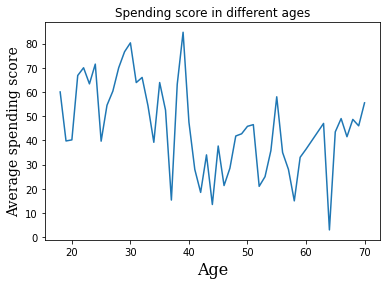

In [25]:
plt.plot(age_list,avg_list)
plt.xlabel('Age' , fontdict = plt_font)
plt.ylabel('Average spending score' , fontdict = {'family':'serif' , 'size':14})
plt.title('Spending score in different ages')
plt.show()

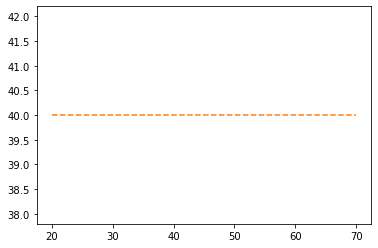

In [26]:
plt.plot([20,70] , [40,40] , linestyle = '--' , c = 'tab:orange')

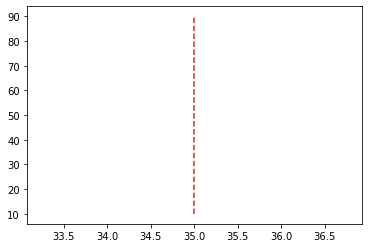

In [27]:
plt.plot([35,35] , [10,90] , linestyle = '--' , c = 'tab:red')

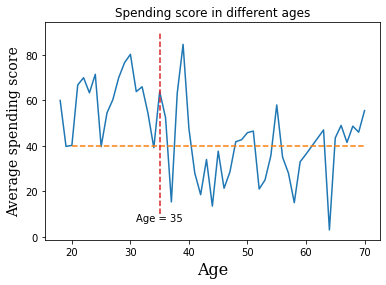

In [28]:
plt.plot(age_list,avg_list)
plt.xlabel('Age' , fontdict = plt_font)
plt.ylabel('Average spending score' , fontdict = {'family':'serif' , 'size':14})
plt.title('Spending score in different ages')

plt.plot([20,70] , [40,40] , linestyle = '--' , c = 'tab:orange')

plt.plot([35,35] , [10,90] , linestyle = '--' , c = 'tab:red')

plt.text(31,7,'Age = 35')

plt.show()

 **Observations**
 - As we seen the plot younger then 35 spending more

<h4 style="color:skyblue">3.5 Scaling</h4>

**Clustering algorithms such as K-means do need feature scaling before they are fed to the algorithm. Since, clustering techniques use Euclidean Distance to form the cohorts, it will be wise to scale the variables.**
- <h5 style="color:brown">Here our problem is clustering and we dont have any label or target feature.<br>So we assume that all of the features are input features.</h5>

In [29]:
sc= StandardScaler()
data_scaled=sc.fit_transform(df)

<h4 style="color:skyblue">3.6 Dimensionality Reduction</h4>

- **Our data is 4 dimension data**
- **So it not possible to see with human eye**
- **Let's do dimension reduction using PCA**
- **PCA reduces to 3D or 2D Here we converting into 2D**

In [30]:
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)
print("Data shape after PCA :",data_pca.shape)

Data shape after PCA : (200, 2)


<h3 style="color:blue">4.Modelling</h3>
<a id="4"></a>


<h4 style="color:red">KMeans Clutering</h4>

<h6 style="color:brown">Elbow Plot</h6>

- <h6>K is a hyperparameter in KMeans algorithm.</h6>
- <h6>WCSS : Within Cluster Sum of Squares, in other word it's sum of squared distance between each point and the centroid in a cluster</h6>
- <h6>Lower WCSS shows a better clustering(because points in a cluster are more similar to each other, this is what we want)</h6>
- <h6>Increasing the k value always results in a lower WCSS.</h6>
- <h6>if we put k to be equal to the number of samples(so each point is a special cluster) then WCSS = 0 , but this is not a wise way.</h6>
- <h6>Here we will use <u>elbow plot</u> to find the best k.</h6>
- <h6>Elbow point will show the best k.</h6>
- <h6>How to find this point ?</h6>
- <h6>After this point the speed of WCSS decreasing will be lowered.</h6>

C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


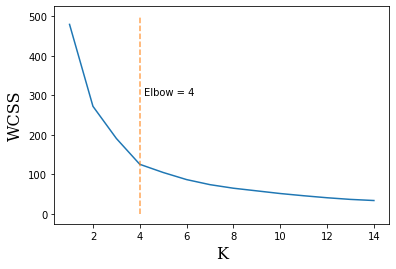

In [31]:
list_score=[]

wcss_list = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i , init = 'k-means++'  , random_state = 1)
    kmeans.fit(data_pca) 
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1,15) , wcss_list)
plt.plot([4,4] , [0 , 500] , linestyle = '--' , alpha = 0.7)
plt.text(4.2 , 300 , 'Elbow = 4')
plt.xlabel('K' , fontdict = plt_font)
plt.ylabel('WCSS' , fontdict = plt_font)
plt.show()

In [32]:
kmeans = KMeans(n_clusters = 4 , init = 'k-means++'  , random_state = 1)
kmeans.fit(data_pca)
cluster_id = kmeans.predict(data_pca)

In [33]:
result_data = pd.DataFrame()
result_data['PC1'] = data_pca[:,0]
result_data['PC2'] = data_pca[:,1]
result_data['ClusterID'] = cluster_id

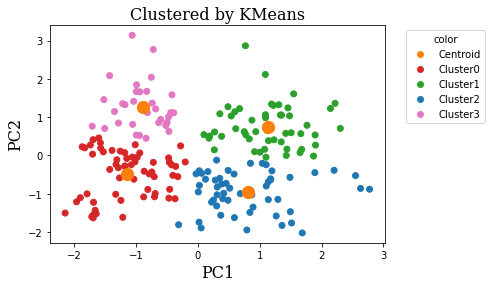

In [34]:
cluster_colors = {0:'tab:red' , 1:'tab:green' , 2:'tab:blue' , 3:'tab:pink'}
cluster_dict = {'Centroid':'tab:orange','Cluster0':'tab:red' , 'Cluster1':'tab:green'
                , 'Cluster2':'tab:blue' , 'Cluster3':'tab:pink'}


plt.scatter(x = result_data['PC1'] , y = result_data['PC2'] 
                , c = result_data['ClusterID'].map(cluster_colors))

handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in cluster_dict.items()]
plt.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.scatter(x = kmeans.cluster_centers_[:,0] , y = kmeans.cluster_centers_[:,1] , marker = 'o' , c = 'tab:orange'
            , s = 150 , alpha = 1)

plt.title("Clustered by KMeans" , fontdict = plt_font)
plt.xlabel("PC1" , fontdict = plt_font)
plt.ylabel("PC2" , fontdict = plt_font)

plt.show()

<h3 style="color:blue">5.Evalution</h3>
<a id="5"></a>

What is silhouette in K means?

The silhouette coefficient is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation)

In [35]:
silhouette_avg = silhouette_score(data_pca,cluster_id)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.4164156778177485


In [36]:
# Checking The various cluster
for i in range(2,15):
    kmeans = KMeans(n_clusters = i , init = 'k-means++'  , random_state = 1)
    kmeans.fit(data_pca)
    cluster_id = kmeans.predict(data_pca)
    silhouette_avg = silhouette_score(data_pca,cluster_id)
    print("The average silhouette_score is for {} cluster".format(i), silhouette_avg)

The average silhouette_score is for 2 cluster 0.40139995663275657
The average silhouette_score is for 3 cluster 0.388244496829095
The average silhouette_score is for 4 cluster 0.4164156778177485
The average silhouette_score is for 5 cluster 0.3877934284115009
The average silhouette_score is for 6 cluster 0.3938770298951967
The average silhouette_score is for 7 cluster 0.38303624355157695
The average silhouette_score is for 8 cluster 0.37981724141426676
The average silhouette_score is for 9 cluster 0.3790466386745573
The average silhouette_score is for 10 cluster 0.3721006098065412
The average silhouette_score is for 11 cluster 0.37253911624185265
The average silhouette_score is for 12 cluster 0.3779514316591157
The average silhouette_score is for 13 cluster 0.3793938362308335
The average silhouette_score is for 14 cluster 0.3866322829144158


 **4 Cluster Giving Better Results**